In [1]:
print('Testing kernel')

Testing kernel


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [3]:
### load dataset，check for missing values and see the data types
dataset = pd.read_csv('E:\CP05_seasonal_bike_rental\dataset\SeoulBikeData.csv')
dataset.info()
print(dataset.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature              8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Dew point temperature    8760 non-null   float64
 8   Solar Radiation (MJ/m2)  8760 non-null   float64
 9   Rainfall(mm)             8760 non-null   float64
 10  Snowfall (cm)            8760 non-null   float64
 11  Seasons                  8760 non-null   object 
 12  Holiday                  8760 non-null   object 
 13  Functioning Day          8760 non-null   object 
dtypes: float64(6), int64(4),

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\TPS-Sean\AppData\Local\Temp\ipykernel_16228\1896551533.py:2: SyntaxWarning: invalid escape sequence '\C'
  dataset = pd.read_csv('E:\CP05_seasonal_bike_rental\dataset\SeoulBikeData.csv')


In [4]:
### remove functioning day as requested
dataset.drop(['Functioning Day'], axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature              8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Dew point temperature    8760 non-null   float64
 8   Solar Radiation (MJ/m2)  8760 non-null   float64
 9   Rainfall(mm)             8760 non-null   float64
 10  Snowfall (cm)            8760 non-null   float64
 11  Seasons                  8760 non-null   object 
 12  Holiday                  8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 889.8+ KB


In [5]:
### convert date to day of week
dataset['Date'] = pd.to_datetime(dataset['Date'], format="%d/%m/%Y").dt.day_name()
dataset.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,Friday,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,Friday,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,Friday,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,Friday,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,Friday,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [6]:
### move Data column to the end
first_column = dataset.columns[0]
new_columns_order = list(dataset.columns[1:]) + [first_column]
dataset = dataset[new_columns_order]
print(dataset.head())

   Rented Bike Count  Hour  Temperature  Humidity(%)  Wind speed (m/s)  \
0                254     0         -5.2           37               2.2   
1                204     1         -5.5           38               0.8   
2                173     2         -6.0           39               1.0   
3                107     3         -6.2           40               0.9   
4                 78     4         -6.0           36               2.3   

   Visibility (10m)  Dew point temperature  Solar Radiation (MJ/m2)  \
0              2000                  -17.6                      0.0   
1              2000                  -17.6                      0.0   
2              2000                  -17.7                      0.0   
3              2000                  -17.6                      0.0   
4              2000                  -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday    Date  
0           0.0            0.0  Winter  No Holiday  Friday  
1     

In [7]:
### split data before EDA (doing this in smaller datasets you may not get to see the true trends of the data reflected in your analysis after removing a portion of it)
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 1:]
y = dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X, y)

      Hour  Temperature  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0         -5.2           37               2.2              2000   
1        1         -5.5           38               0.8              2000   
2        2         -6.0           39               1.0              2000   
3        3         -6.2           40               0.9              2000   
4        4         -6.0           36               2.3              2000   
...    ...          ...          ...               ...               ...   
8755    19          4.2           34               2.6              1894   
8756    20          3.4           37               2.3              2000   
8757    21          2.6           39               0.3              1968   
8758    22          2.1           41               1.0              1859   
8759    23          1.9           43               1.3              1909   

      Dew point temperature  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                

In [8]:
### check on categorical features
print(dataset['Seasons'].unique())
print(dataset['Holiday'].unique())
print(dataset['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [9]:
# Statistical summary of numerical features (central tendencies, spread, and shape of the data)
X_train.select_dtypes(include=['number']).describe()


,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,11.443350,12.902297,58.296233,1.722731,1439.354452,4.114640,0.571855,0.158019,0.074244
std,6.914321,12.029618,20.458227,1.033371,606.546532,13.159788,0.868846,1.183760,0.435499
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,5.000000,3.400000,42.000000,0.900000,946.000000,-4.600000,0.000000,0.000000,0.000000
50%,11.000000,13.800000,57.000000,1.500000,1703.000000,5.200000,0.010000,0.000000,0.000000
75%,17.000000,22.600000,74.000000,2.300000,2000.000000,14.900000,0.940000,0.000000,0.000000
max,23.000000,39.400000,98.000000,7.300000,2000.000000,27.200000,3.520000,35.000000,8.800000


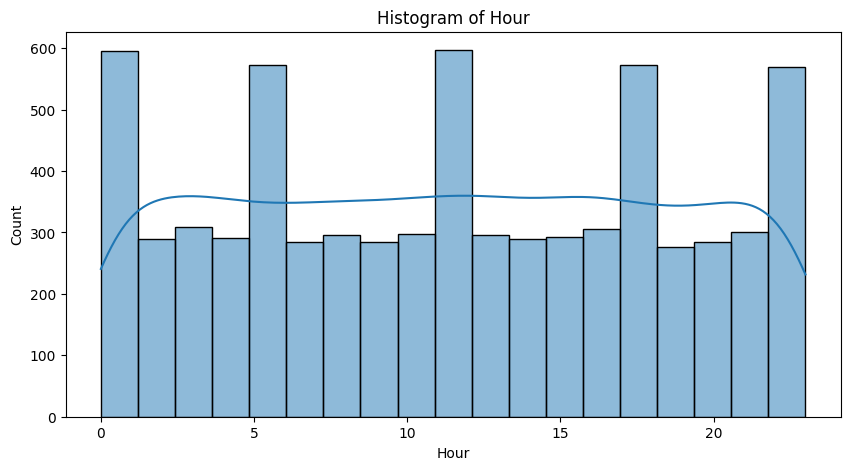

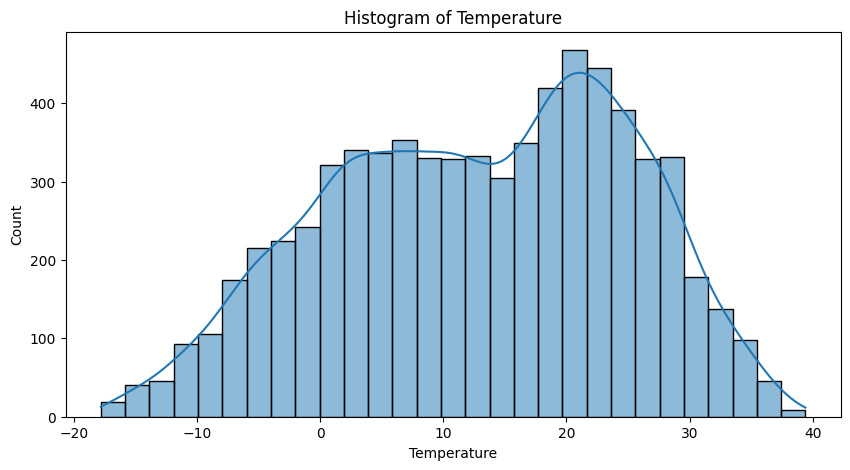

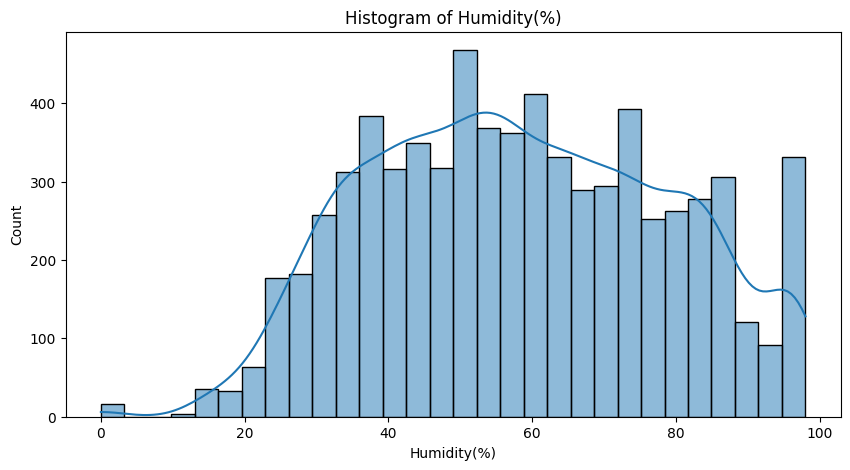

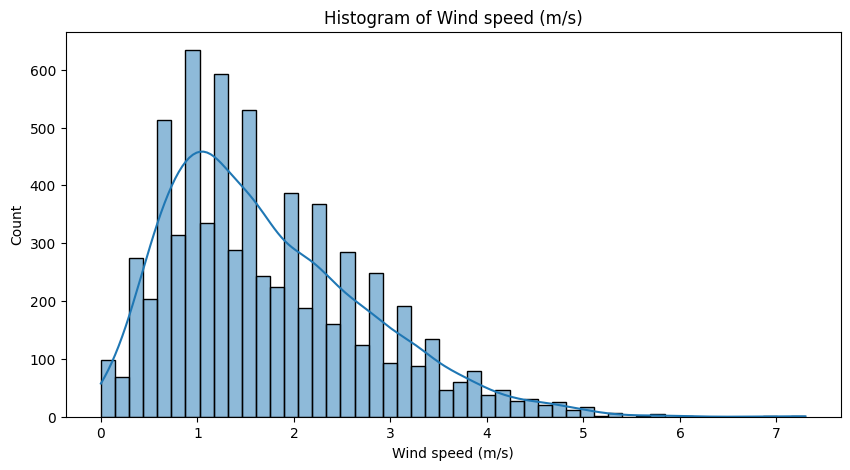

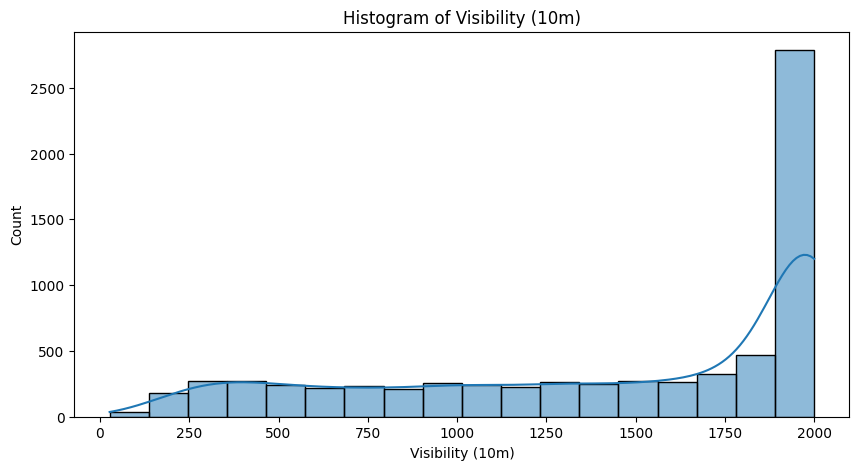

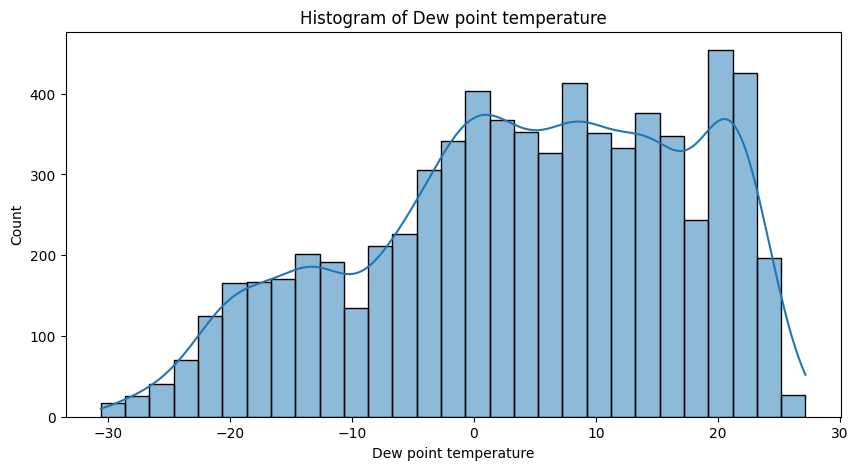

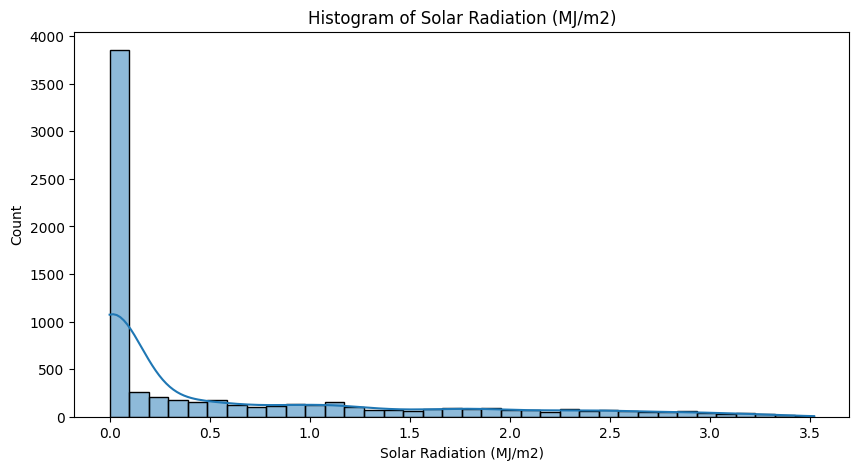

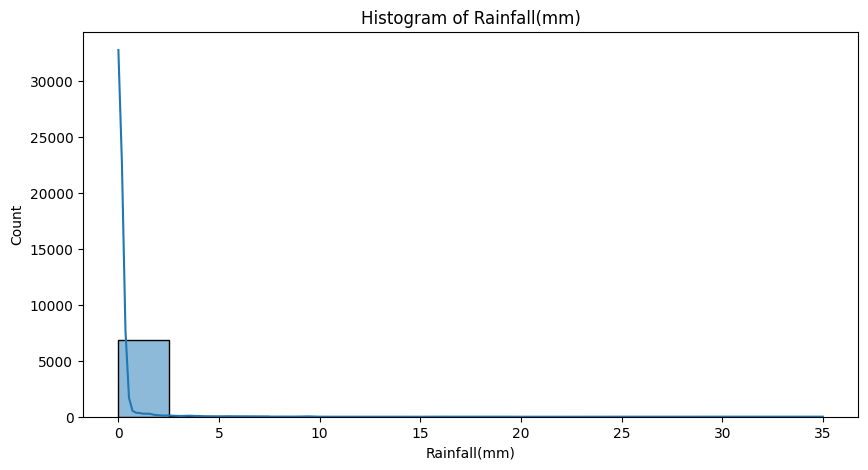

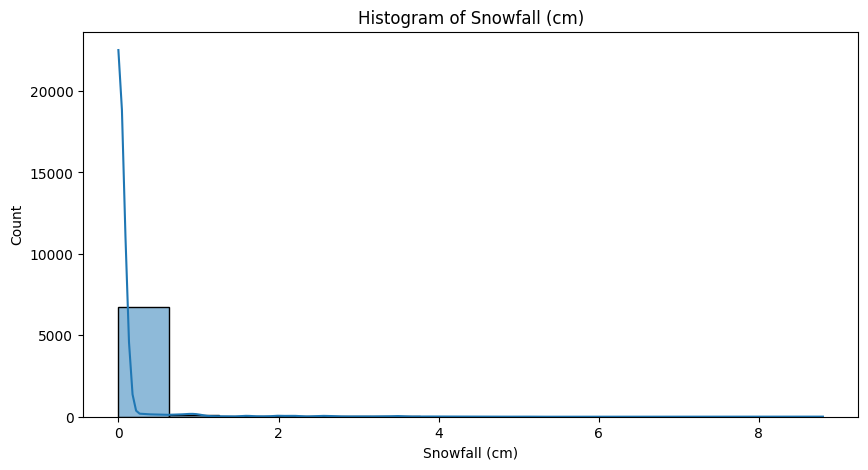

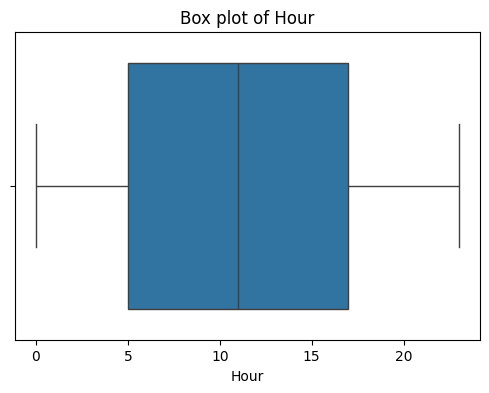

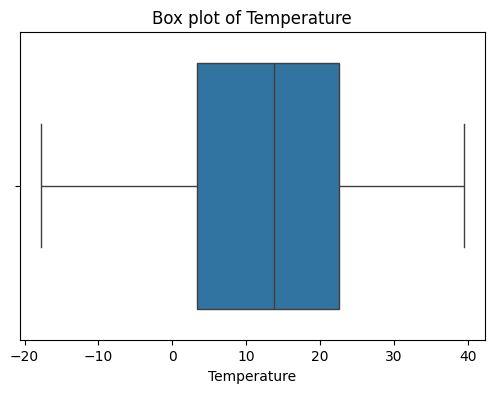

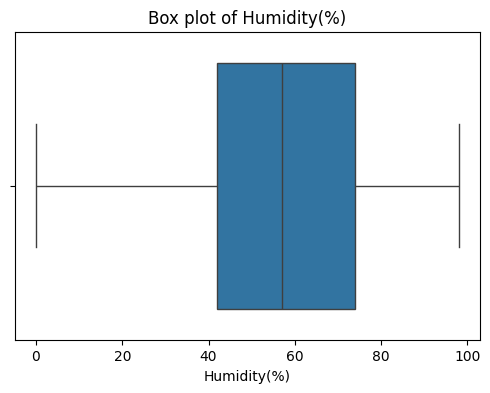

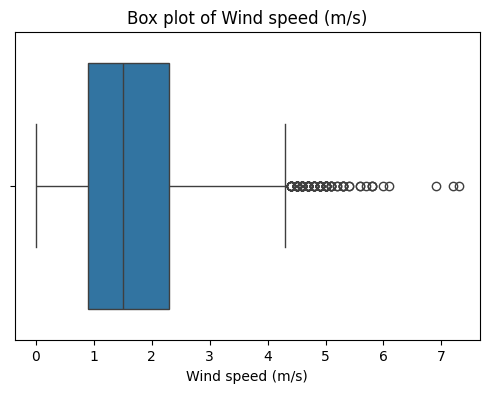

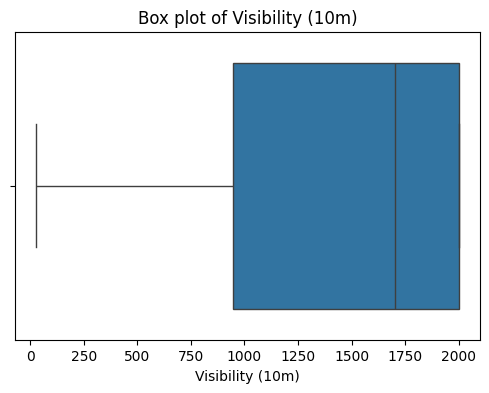

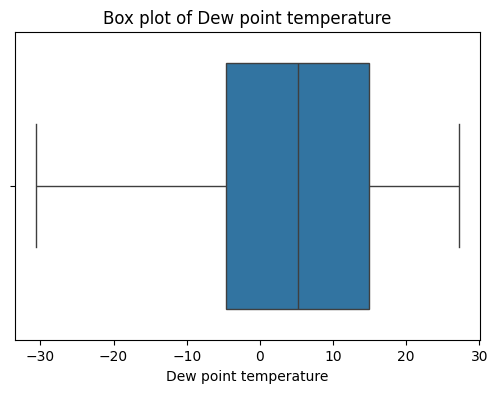

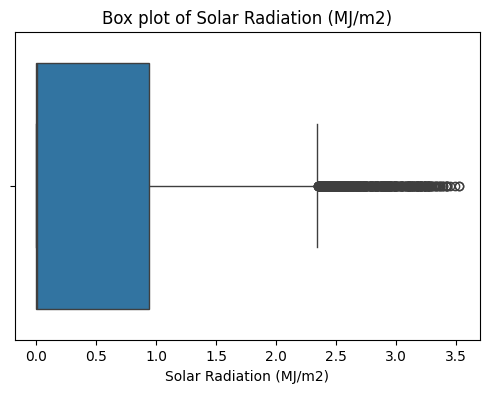

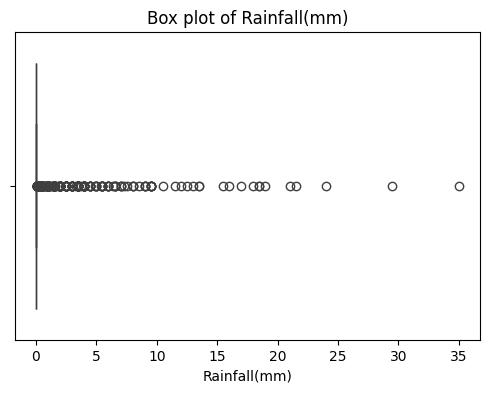

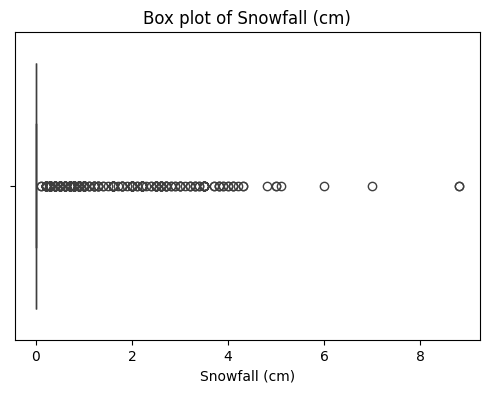

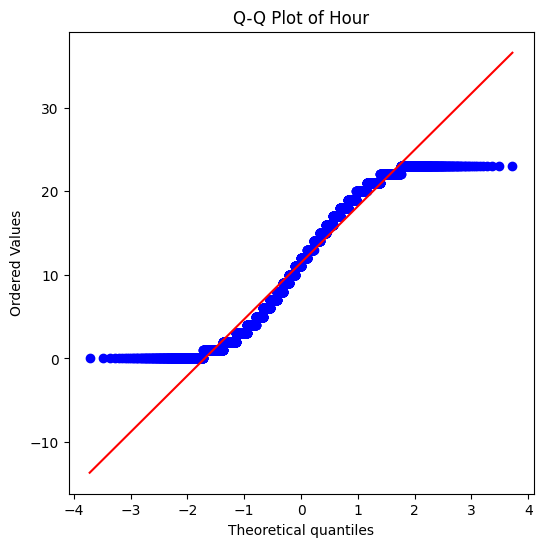

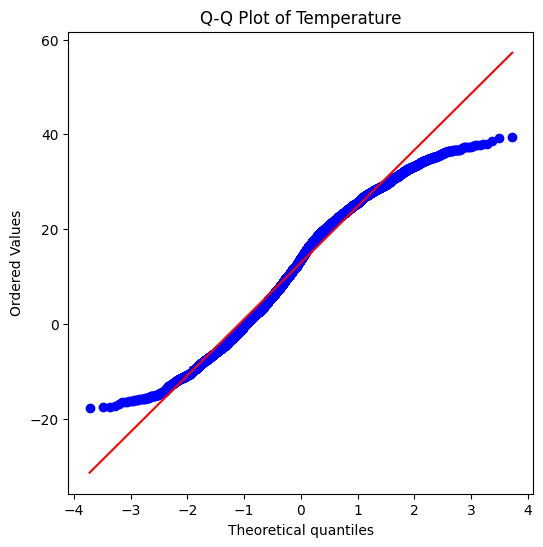

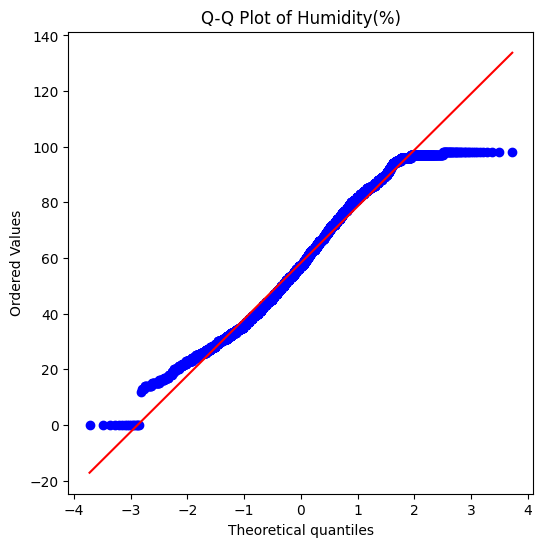

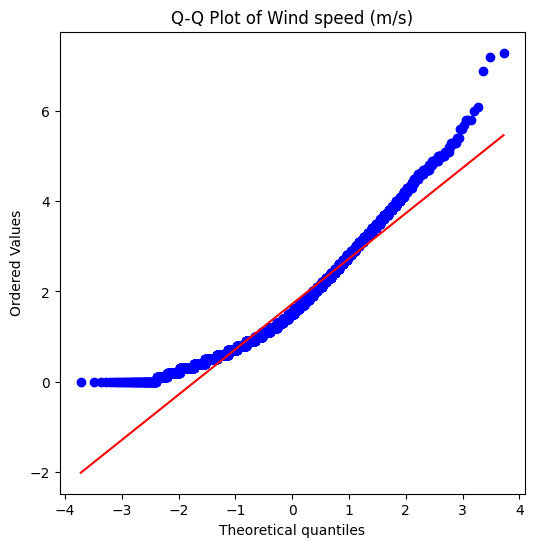

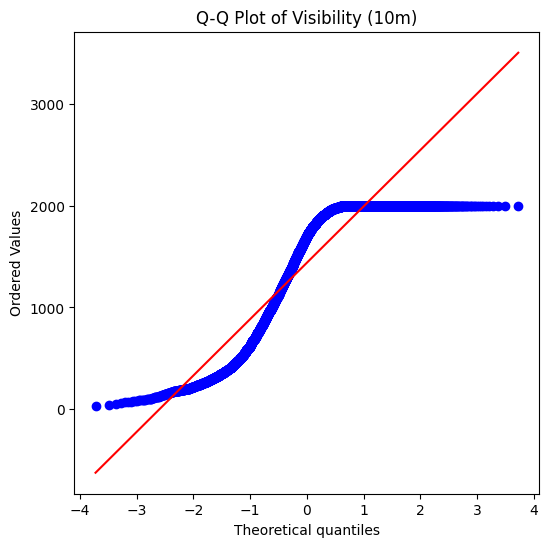

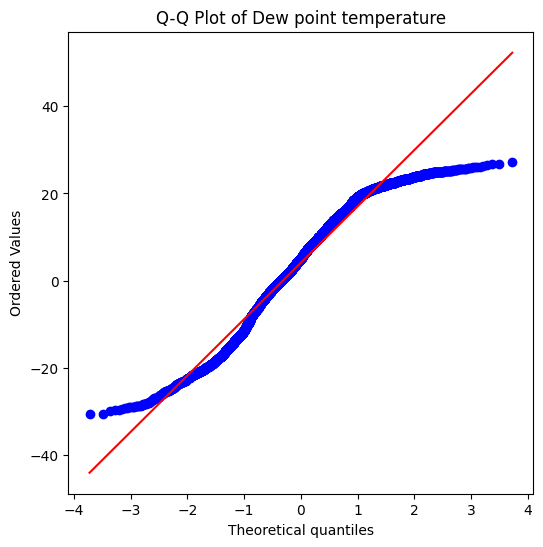

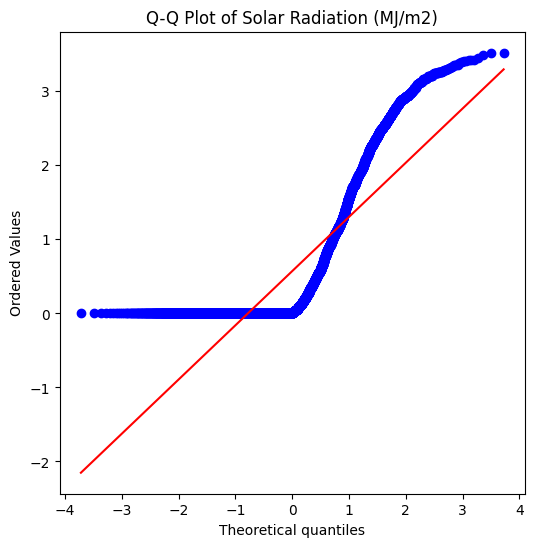

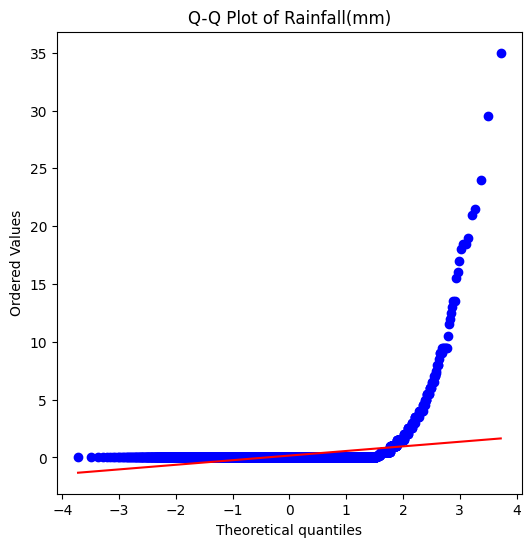

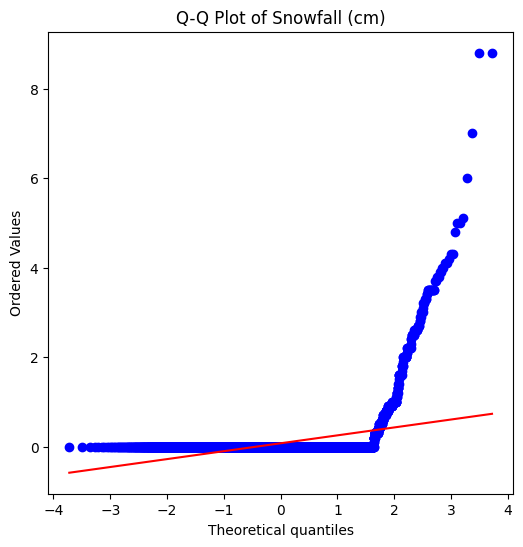

In [10]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
### Histogram
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Histogram of {column}')
# Histogram

    
# Box plot
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X_train[col])
    plt.title(f'Box plot of {col}')
    plt.show()


    
# Q-Q plot
import scipy.stats as stats
for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
#plt.tight_layout()
plt.show()

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 3788 to 649
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     7008 non-null   int64  
 1   Temperature              7008 non-null   float64
 2   Humidity(%)              7008 non-null   int64  
 3   Wind speed (m/s)         7008 non-null   float64
 4   Visibility (10m)         7008 non-null   int64  
 5   Dew point temperature    7008 non-null   float64
 6   Solar Radiation (MJ/m2)  7008 non-null   float64
 7   Rainfall(mm)             7008 non-null   float64
 8   Snowfall (cm)            7008 non-null   float64
 9   Seasons                  7008 non-null   object 
 10  Holiday                  7008 non-null   object 
 11  Date                     7008 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 711.8+ KB


       Seasons     Holiday    Date
count     7008        7008    7008
unique       4           2       7
top     Summer  No Holiday  Friday
freq      1785        6664    1018


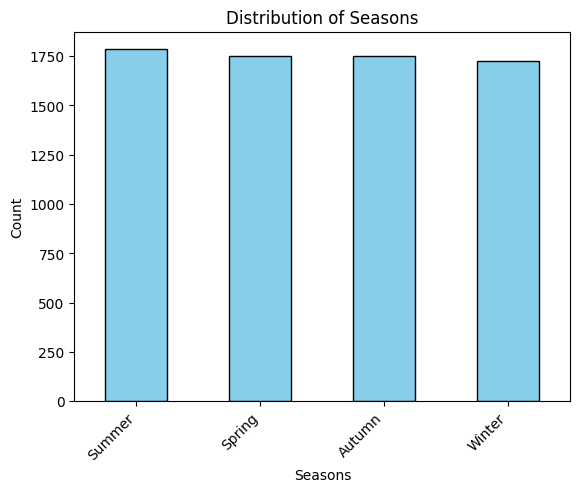

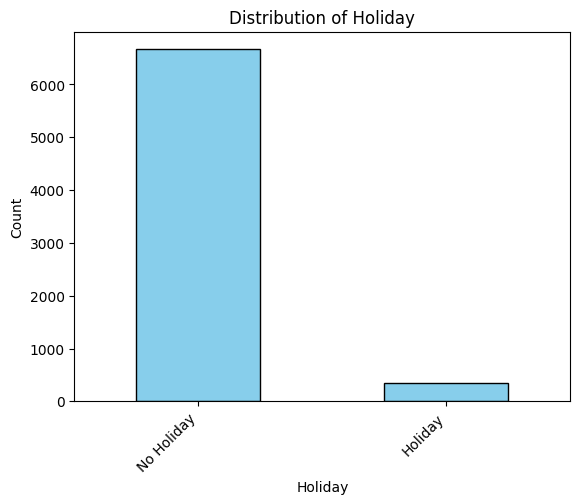

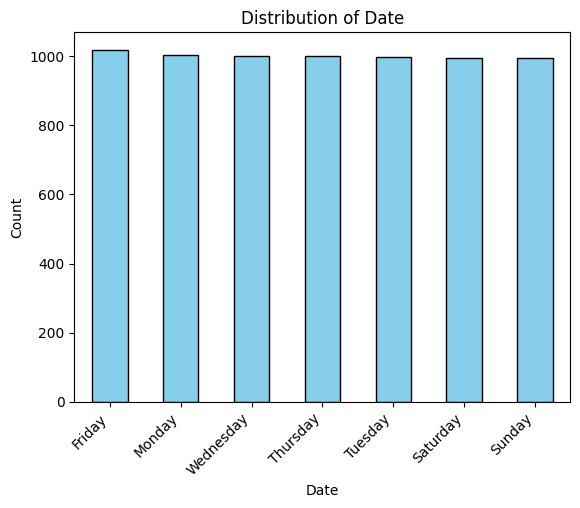

In [12]:
### Statistical summary of categorical features (distribution)
print(X_train.iloc[:, [9,10,11]].describe())
# Plot bar plot
selected_columns = X_train.iloc[:, [9, 10, 11]]
column_names = selected_columns.columns

# Create a plot for each column
for column in column_names:
    # Count the occurrences of each category
    category_counts = selected_columns[column].value_counts()
    
    # Plot the bar plot
    plt.figure()  # Create a new figure for each plot
    category_counts.plot(kind='bar', edgecolor='black', color='skyblue')
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [13]:
# Correlation analysis
def correlation_analysis(df, method='pearson', threshold=0.5):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    corr_matrix = numeric_df.corr(method=method)
    
    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'{method.capitalize()} Correlation Heatmap')
    plt.show()
    
    # Find highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    # Print highly correlated pairs
    if high_corr_pairs:
        print(f"\nHighly correlated feature pairs (threshold = {threshold}):")
        for pair in high_corr_pairs:
            print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
    else:
        print(f"\nNo feature pairs found with correlation higher than {threshold}")
    
    return corr_matrix, high_corr_pairs

# Usage
# corr_matrix, high_corr_pairs = correlation_analysis(df, method='pearson', threshold=0.5)

# To create pairplot for specific variables
def create_pairplot(df, variables):
    sns.pairplot(df[variables], diag_kind='kde')
    plt.suptitle('Pairplot of Selected Variables', y=1.02)
    plt.show()

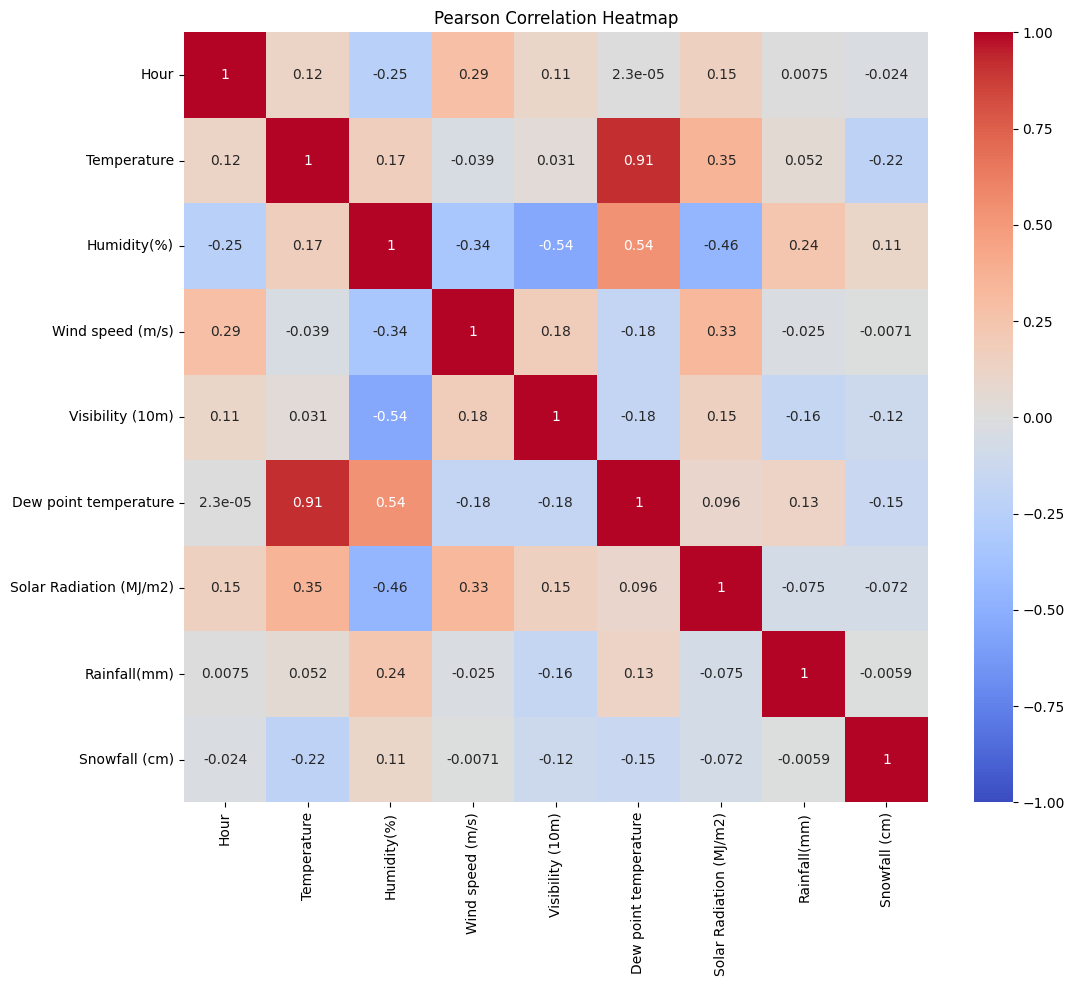


Highly correlated feature pairs (threshold = 0.5):
Visibility (10m) - Humidity(%): -0.54
Dew point temperature - Temperature: 0.91
Dew point temperature - Humidity(%): 0.54


In [14]:
# Run correlation analysis
corr_matrix, high_corr_pairs = correlation_analysis(X_train, method='pearson', threshold=0.5)

In [15]:
def create_pairplot(df, variables):
    sns.pairplot(df[variables], diag_kind='kde')
    plt.suptitle('Pairplot of Selected Variables', y=1.02)
    plt.show()

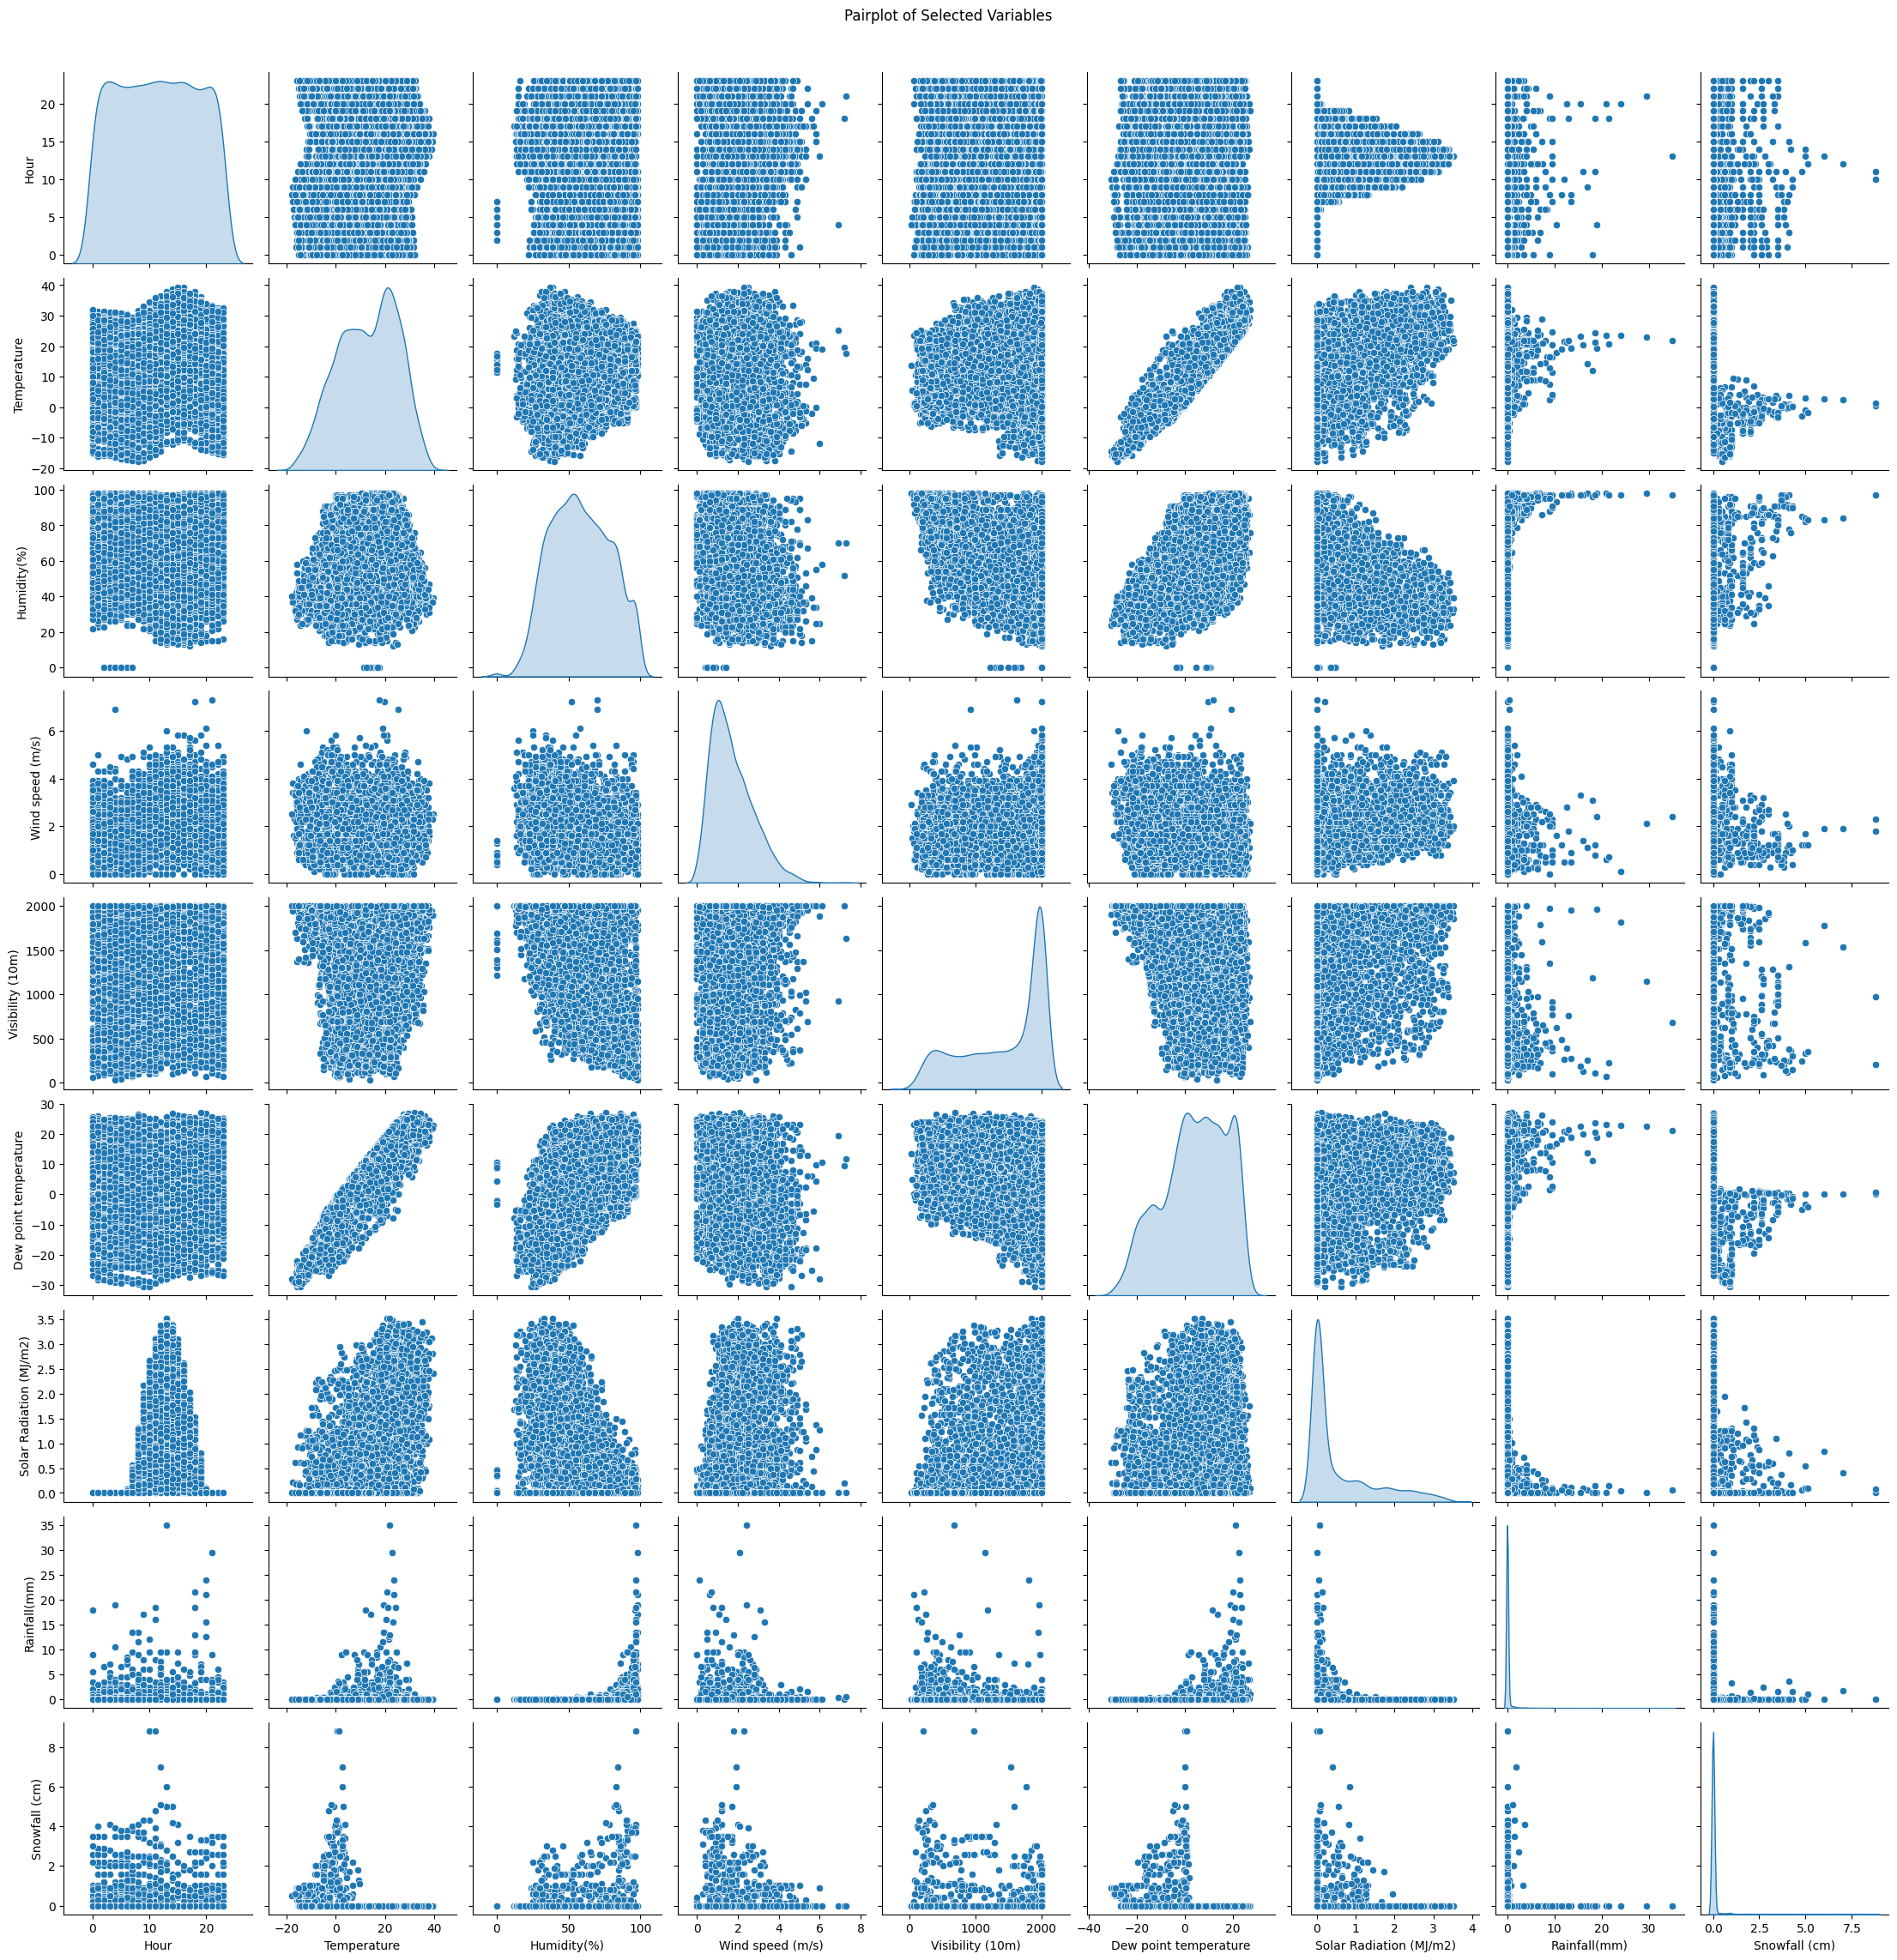

In [16]:
create_pairplot(X_train, ['Hour','Temperature','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'])

In [17]:
# Drop highly correlated features, dropped dew point temperature because teamperature seemed to have a better distribution
X_train.drop(['Dew point temperature'], axis = 1, inplace = True)
X_train

,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Date
3788,20,20.9,61,2.7,1523,0.01,0.0,0.0,Spring,No Holiday,Monday
4718,14,26.4,43,2.1,1944,3.23,0.0,0.0,Summer,No Holiday,Friday
1740,12,-3.9,28,2.9,1921,2.12,0.0,0.0,Winter,No Holiday,Sunday
4938,18,29.8,35,3.3,1805,1.15,0.0,0.0,Summer,No Holiday,Sunday
1235,11,1.9,25,1.0,1493,0.78,0.0,0.0,Winter,No Holiday,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
3003,3,8.9,64,2.2,2000,0.00,0.0,0.0,Spring,No Holiday,Thursday
2960,8,17.3,71,0.5,1481,0.17,0.0,0.0,Spring,No Holiday,Tuesday
2036,20,6.4,77,2.8,316,0.00,0.0,0.0,Winter,No Holiday,Friday
785,17,0.3,27,2.6,2000,0.18,0.0,0.0,Winter,No Holiday,Tuesday


In [18]:
### process categorical features
Seasons_dummies = pd.get_dummies(X_train['Seasons'], drop_first = True, dtype = int)
X_train = pd.concat([X_train, Seasons_dummies], axis = 1)
X_train.drop(['Seasons'], axis = 1, inplace = True)

Date_dummies = pd.get_dummies(X_train['Date'], drop_first = True, dtype = int)
X_train = pd.concat([X_train, Date_dummies], axis = 1)
X_train.drop(['Date'], axis = 1, inplace = True)

X_train['Holiday'] = X_train['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

print(X_train.head(30))

      Hour  Temperature  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
3788    20         20.9           61               2.7              1523   
4718    14         26.4           43               2.1              1944   
1740    12         -3.9           28               2.9              1921   
4938    18         29.8           35               3.3              1805   
1235    11          1.9           25               1.0              1493   
5489    17         31.8           52               2.4              1438   
1638     6        -13.2           50               0.5              1873   
8421    21          6.8           73               2.3               730   
902     14          1.9           32               0.7              1368   
8106    18         14.2           51               1.5               990   
6804    12         26.7           40               1.4              2000   
7423     7         16.5           97               2.3               364   
2645     5  

In [19]:
# preprocess test data
Seasons_dummies = pd.get_dummies(X_test['Seasons'], drop_first = True, dtype = int)
X_test = pd.concat([X_test, Seasons_dummies], axis = 1)
X_test.drop(['Seasons'], axis = 1, inplace = True)

Date_dummies = pd.get_dummies(X_test['Date'], drop_first = True, dtype = int)
X_test = pd.concat([X_test, Date_dummies], axis = 1)
X_test.drop(['Date'], axis = 1, inplace = True)

X_test['Holiday'] = X_test['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

X_test.drop(['Dew point temperature'], axis = 1, inplace = True)

X_test.head()

,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
8015,23,7.7,50,1.0,1988,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1,0
2445,21,8.7,49,1.7,464,0.00,0.0,0.0,0,1,0,0,1,0,0,0,0,0
4361,17,27.2,42,2.9,1828,1.79,0.0,0.0,0,1,0,0,0,0,0,1,0,0
4104,0,15.3,29,1.3,2000,0.00,0.0,0.0,0,1,0,0,1,0,0,0,0,0
111,15,-0.7,28,0.0,2000,0.00,0.0,0.0,0,0,0,1,0,0,0,0,1,0


In [20]:
# turn X_train, X_test, y_train and y_test into numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



In [21]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7008, 18) (7008,) (1752, 18) (1752,)


In [29]:
# Model Building
import xgboost as xgb
model = xgb.XGBRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

# adjusted r-squared
n = X_test.shape[0]
k = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
adj_r2

# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
r2s = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, scoring = 'r2')
r2s

print("Avergage R2: {:.3f}".format(r2s.mean()))
print("SD R2: {:.3f}".format(r2s.std()))

Avergage R2: 0.841
SD R2: 0.026


In [31]:
print(r2, adj_r2)

0.8334072232246399 0.8316768885553055
